# 第二题：决策树处理回归任务

实验内容
1.	使用sklearn.tree.DecisionTreeRegressor完成kaggle房价预测问题
2.	计算最大深度为10的决策树，训练集上十折交叉验证的MAE和RMSE
3.	绘制最大深度从1到30，决策树在训练集和测试集上MAE的变化曲线
4.  选择一个合理的树的最大深度，并给出理由

## 1. 读取数据

In [1]:
import pandas as pd
data = pd.read_csv('data/kaggle_house_price_prediction/kaggle_hourse_price_train.csv')

In [2]:
# 丢弃有缺失值的特征（列）
data.dropna(axis = 1, inplace = True)

# 只保留整数的特征
data = data[[col for col in data.dtypes.index if data.dtypes[col] == 'int64']]

In [3]:
data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


## 2. 数据集划分

70%做训练集，30%做测试集

In [4]:
from sklearn.utils import shuffle

In [5]:
data_shuffled = shuffle(data, random_state = 32)
split_line = int(len(data_shuffled) * 0.7)
training_data = data_shuffled[:split_line]
testing_data = data_shuffled[split_line:]

## 3. 导入模型

In [6]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [7]:
from sklearn.tree import DecisionTreeRegressor

## 4. 选取特征和标记

In [13]:
features = data.columns.tolist()
target = 'SalePrice'
features.remove(target)


## 5. 训练与预测

请你在下面计算树的最大深度为10时，使用训练集全量特征训练的决策树的十折交叉验证的MAE和RMSE  

In [20]:
model = DecisionTreeRegressor(max_depth = 10) # 参数max_depth决定了决策树的最大深度

prediction = cross_val_predict(model, training_data[features], training_data[target], cv=10)

mse = mean_squared_error(training_data[target], prediction)
mae = mean_absolute_error(training_data[target], prediction)
import numpy as np
rmse = np.sqrt(mse)
print(mae, rmse, mse)

27603.7306746 47363.4037293 2243292012.83


###### 双击此处编辑
最大深度为10，全量特征的决策树，十折交叉验证指标

MAE|RMSE
-|-
27603.7306746|47363.4037293

## 6. 改变最大深度，绘制决策树的精度变换图

绘制最大深度从1到30，决策树训练集和测试集MAE的变化图

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

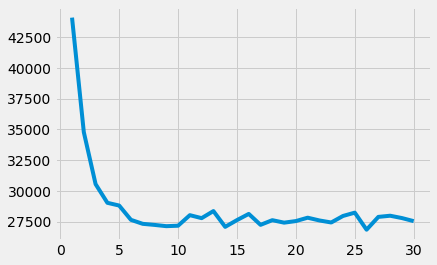

In [23]:
# YOUR CODE HERE
models = [DecisionTreeRegressor(max_depth = depth) for depth in range(1,31)]
predictions = [cross_val_predict(model, training_data[features], training_data[target], cv=10) for model in models]
maes = [mean_absolute_error(training_data[target], prediction) for prediction in predictions]
x = [i for i in range(1,31)]

plt.plot(x, maes)
plt.show()

请你选择一个合理的树的最大深度，并给出理由
###### 从图中可以看出，树最大深度达到10的时候效果很好。随着树深度的继续增大，会产生过拟合。而减小，则会产生欠拟合。



